In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import pandas as pd

In [2]:
from nnAudio import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
device = "cuda:0"

In [4]:
y_list = np.load('./y_list.npy')
y_torch = torch.tensor(y_list, device=device).float()

# STFT

In [4]:
spec_layer = Spectrogram.STFT(device=device)
timing = []
for e in range(20):
    t_start = time.time()
    spec = spec_layer(y_torch[:1000])
    spec = spec_layer(y_torch[1000:])
    time_used = time.time()-t_start
#     print(time_used)
    timing.append(time_used)
    
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

STFT kernels created, time used = 0.0648 seconds
mean =  0.03635083436965943
std =  0.1502913283380972


In [11]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'
data.to_csv('./result/Spec_torch_GPU')

In [6]:
spec = spec_layer(y_torch[:1000])

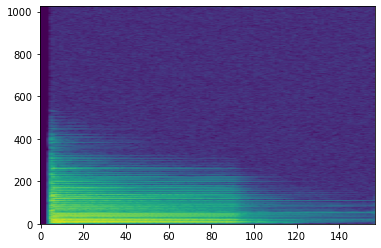

In [7]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower')

# Melspectrogram

In [8]:
spec_layer = Spectrogram.MelSpectrogram(sr=44100, device=device)
timing = []
for e in range(20):
    t_start = time.time()
    spec = spec_layer(y_torch[:1000])
    spec = spec_layer(y_torch[1000:])
    time_used = time.time()-t_start
#     print(time_used)
    timing.append(time_used)
    
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
mean =  0.03048955202102661
std =  0.12717606602824652


In [10]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'
data.to_csv('./result/Mel_torch_GPU')

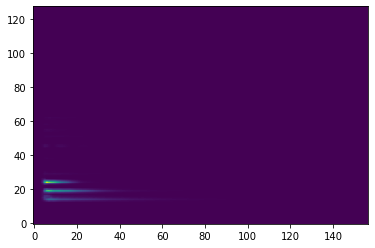

In [10]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')

# CQT 1992v2

In [4]:
spec_layer = Spectrogram.CQT1992v2(sr=44100, n_bins=84*2, bins_per_octave=24, fmin=55, device=device)
timing = []
for e in range(20):
    t_start = time.time()
    spec = spec_layer(y_torch[:1000])
    spec = spec_layer(y_torch[1000:])
    time_used = time.time()-t_start
#     print(time_used)
    timing.append(time_used)
    
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

CQT kernels created, time used = 0.1107 seconds
mean =  0.03167051076889038
std =  0.1311743668227233


In [9]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'
data.to_csv('./result/CQT1992_torch_GPU')

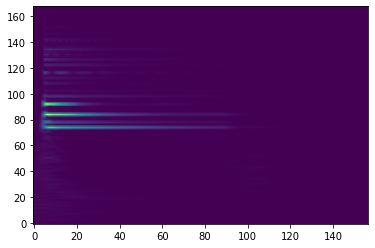

In [6]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')

# CQT 2010v2

In [14]:
spec_layer = Spectrogram.CQT2010v2(sr=44100, n_bins=84*2, bins_per_octave=24, fmin=55, device=device)
timing = []
for e in range(20):
    t_start = time.time()
    spec = spec_layer(y_torch[:1000])
    spec = spec_layer(y_torch[1000:])
    time_used = time.time()-t_start
#     print(time_used)
    timing.append(time_used)
    
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

Low pass filter created, time used = 0.0150 seconds
num_octave =  7
No early downsampling is required, downsample_factor =  1
Early downsampling filter created, time used = 0.0000 seconds
CQT kernels created, time used = 0.0090 seconds
mean =  0.445145857334137
std =  0.3949693780231463


In [8]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'
data.to_csv('./result/CQT2010_torch_GPU')

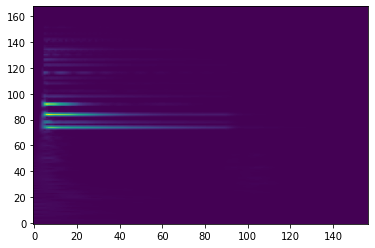

In [16]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')